In [1]:
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("merged_df")

In [3]:
df.drop(['Unnamed: 0','car','charge_segment'],axis=1,inplace=True)
df.head()

,label,soc,max_single_volt,min_single_volt,max_temp,min_temp,mean_volt,median_volt,mode_volt,sum_volt,...,kurtosis_volt,iqr_volt,mean_current,median_current,mode_current,sum_current,std_current,variance_current,kurtosis_current,iqr_current
0,0,45.503125,3.639583,3.629818,23.0,21.0,2.414735e-15,0.010276,0.826233,3.090861e-13,...,-0.383884,1.542639,-150.524827,-158.875,-144.75,-19267.177878,23.667606,560.155562,23.574998,14.314583
1,0,45.534375,3.648698,3.638932,23.0,21.0,2.414735e-15,0.010276,0.826233,3.090861e-13,...,-0.383884,1.542639,-150.524827,-158.875,-144.75,-19267.177878,23.667606,560.155562,23.574998,14.314583
2,0,45.565625,3.657812,3.648047,23.0,21.0,2.414735e-15,0.010276,0.826233,3.090861e-13,...,-0.383884,1.542639,-150.524827,-158.875,-144.75,-19267.177878,23.667606,560.155562,23.574998,14.314583
3,0,45.613542,3.668750,3.658789,23.0,21.0,2.414735e-15,0.010276,0.826233,3.090861e-13,...,-0.383884,1.542639,-150.524827,-158.875,-144.75,-19267.177878,23.667606,560.155562,23.574998,14.314583
4,0,45.811458,3.696094,3.684180,23.0,21.0,2.414735e-15,0.010276,0.826233,3.090861e-13,...,-0.383884,1.542639,-150.524827,-158.875,-144.75,-19267.177878,23.667606,560.155562,23.574998,14.314583


In [4]:
df.columns

Index(['label', 'soc', 'max_single_volt', 'min_single_volt', 'max_temp',
       'min_temp', 'mean_volt', 'median_volt', 'mode_volt', 'sum_volt',
       'std_volt', 'variance_volt', 'kurtosis_volt', 'iqr_volt',
       'mean_current', 'median_current', 'mode_current', 'sum_current',
       'std_current', 'variance_current', 'kurtosis_current', 'iqr_current'],
      dtype='object')

In [5]:
X = df[['soc','max_temp','min_temp','iqr_current','variance_current','std_current','kurtosis_current','sum_current','median_current','mean_current','median_volt','mean_volt','mode_volt']]
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print(pd.Series(y_train_resampled).value_counts())

/home/maunakea/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/maunakea/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/maunakea/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/maunakea/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

label
10    6726687
0     6726687
Name: count, dtype: int64


/home/maunakea/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/maunakea/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/maunakea/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/maunakea/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype


Model Report
Accuracy : 0.9952


/home/maunakea/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/maunakea/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/maunakea/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/maunakea/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

AUC Score (Train): 0.999895


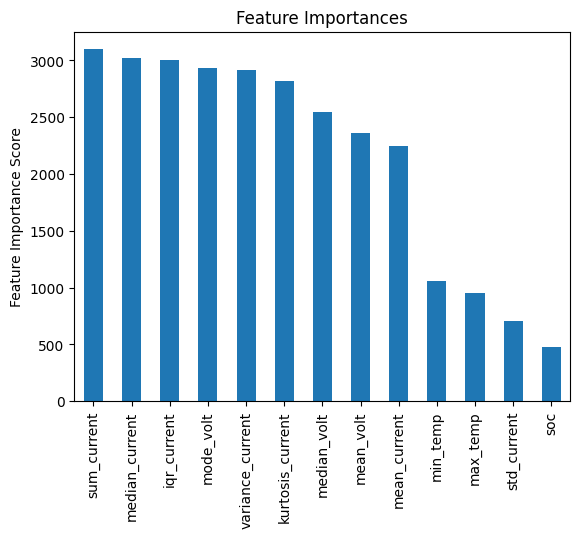

In [6]:
from sklearn import metrics
df['label'] = df['label'].apply(lambda x: 0 if x == 0 else 1) 
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_pa
Again, I tried to install imblearn through pip, it works for me.

(base) C:\WINDOWS\system32>pip install -U imbalanced-learn
Requirement already up-to-date: imbalanced-learn in c:\users\ashok\anaconda3\lib\site-packages (0.4.3)
Requirement already satisfied, skipping upgrade: numpy>=1.8.2 in c:\users\ashok\anaconda3\lib\site-packages (from imbalanced-learn) (1.15.3)
Requirement already satisfied, skipping upgrade: scipy>=0.13.3 in c:\users\ashok\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)
Requirement already satisfied, skipping upgrade: scikit-learn>=0.20 in c:\users\ashok\anaconda3\lib\site-packages (from imbalanced-learn) (0.20.0)
rams()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target], eval_metric='auc')
        
    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:, 1]
        
    # Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

# Assuming df is your DataFrame
# Replace 'Disbursed' with your actual target variable and specify predictors
   
target_variable = 'label'
predictors_list = ['soc', 'max_temp', 'min_temp', 'iqr_current', 'variance_current', 'std_current', 'kurtosis_current', 'sum_current', 'median_current', 'mean_current', 'median_volt', 'mean_volt', 'mode_volt']

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

# Use modelfit to train and evaluate the model
modelfit(xgb_model, train_df, predictors_list, target_variable)
